In [55]:
import numpy as np
import cv2
import pandas as pd
import os
import cv2
import shutil
import pandas as pd
from shutil import move
from subprocess import call 
import matplotlib.pyplot as plt
from urllib.request import urlretrieve
from sklearn.model_selection import train_test_split
from PIL import Image
from keras.preprocessing import image
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import LabelEncoder


import os
import gc
from timeit import default_timer as timer
%matplotlib inline

## Define Image Directories

In [22]:
Data = 'drive/My Drive/Sickle cell detection/DB1(99-146)/'


In [23]:
# Load the CSV file into a pandas dataframe
df = pd.read_csv('drive/My Drive/Sickle cell detection/Merged Labels.csv')

## EDA

In [24]:
# Check any rows with missing data
df.isna().sum()

Unnamed: 0      0
label_name      0
bbox_x          0
bbox_y          0
bbox_width      0
bbox_height     0
image_name      0
image_width     0
image_height    0
dtype: int64

In [10]:
#No Missing Values in data

In [25]:
df


,Unnamed: 0,label_name,bbox_x,bbox_y,bbox_width,bbox_height,image_name,image_width,image_height
0,0,Normal,436,327,54,55,pos002_EDOF_DENISOVAN_RGB (10).tiff_01_01.png,566,483
1,1,Sickle,341,307,79,36,pos002_EDOF_DENISOVAN_RGB (10).tiff_01_01.png,566,483
2,2,Crystal,159,233,79,48,pos002_EDOF_DENISOVAN_RGB (10).tiff_01_01.png,566,483
3,3,Other,268,211,58,57,pos002_EDOF_DENISOVAN_RGB (10).tiff_01_01.png,566,483
4,4,Normal,207,312,63,61,pos002_EDOF_DENISOVAN_RGB (10).tiff_01_01.png,566,483
...,...,...,...,...,...,...,...,...,...
66451,1264,Sickle,429,116,71,67,FieldPos296_EDOF_RGB.tiff_02_01.png,566,483
66452,1265,Sickle,191,225,40,92,FieldPos296_EDOF_RGB.tiff_02_01.png,566,483
66453,1266,Sickle,39,260,70,45,FieldPos296_EDOF_RGB.tiff_02_01.png,566,483
66454,1267,Sickle,427,128,80,42,FieldPos296_EDOF_RGB.tiff_02_02.png,566,483


In [26]:
# Print the shape of the dataframe
print('Shape:', df.shape)

Shape: (66456, 9)


In [27]:
# Print the data types of each column
print('Data Types:', df.dtypes)

Data Types: Unnamed: 0       int64
label_name      object
bbox_x           int64
bbox_y           int64
bbox_width       int64
bbox_height      int64
image_name      object
image_width      int64
image_height     int64
dtype: object


In [28]:
#summary statistics for numerical columns
print('Summary Statistics:', df.describe())

Summary Statistics:          Unnamed: 0        bbox_x        bbox_y    bbox_width   bbox_height  \
count  66456.000000  66456.000000  66456.000000  66456.000000  66456.000000   
mean    2385.774196    548.038883    423.401529     84.010804     80.302636   
std     1901.467128    700.326977    515.828546     58.860433     60.335249   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      785.750000    152.000000    125.000000     49.000000     46.000000   
50%     1884.000000    318.000000    260.000000     58.000000     54.000000   
75%     3643.000000    480.000000    399.000000     86.000000     75.000000   
max     7197.000000   3238.000000   2395.000000    737.000000   1049.000000   

        image_width  image_height  
count  66456.000000  66456.000000  
mean    1182.363248    931.907999  
std     1132.724016    824.982465  
min      566.000000    483.000000  
25%      566.000000    483.000000  
50%      566.000000    483.000000  
75%      566.000

In [29]:
# Number of unique values in each column
print('Unique Values:', df.nunique())

Unique Values: Unnamed: 0      7198
label_name         5
bbox_x          1804
bbox_y          1410
bbox_width       265
bbox_height      240
image_name       720
image_width        2
image_height       2
dtype: int64


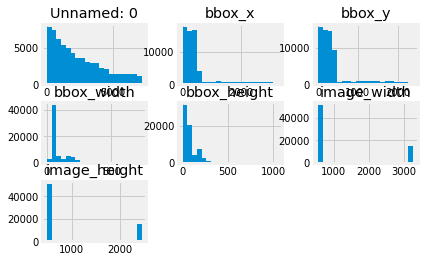

In [34]:
# Plot a histogram of each numerical column
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
df[numerical_cols].hist(bins=20)
plt.show()

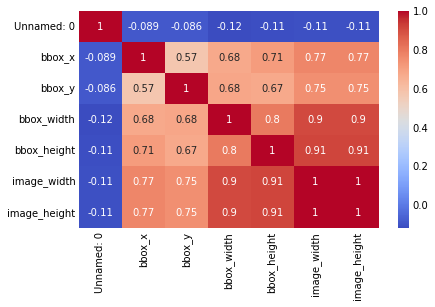

In [37]:
# Plot a heatmap of the correlation matrix for numerical columns
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()


In [ ]:
# Image_width and image height has high corelation

In [46]:
df.drop("image_height", axis='columns')

,Unnamed: 0,label_name,bbox_x,bbox_y,bbox_width,bbox_height,image_name,image_width
0,0,Normal,436,327,54,55,pos002_EDOF_DENISOVAN_RGB (10).tiff_01_01.png,566
1,1,Sickle,341,307,79,36,pos002_EDOF_DENISOVAN_RGB (10).tiff_01_01.png,566
2,2,Crystal,159,233,79,48,pos002_EDOF_DENISOVAN_RGB (10).tiff_01_01.png,566
3,3,Other,268,211,58,57,pos002_EDOF_DENISOVAN_RGB (10).tiff_01_01.png,566
4,4,Normal,207,312,63,61,pos002_EDOF_DENISOVAN_RGB (10).tiff_01_01.png,566
...,...,...,...,...,...,...,...,...
66451,1264,Sickle,429,116,71,67,FieldPos296_EDOF_RGB.tiff_02_01.png,566
66452,1265,Sickle,191,225,40,92,FieldPos296_EDOF_RGB.tiff_02_01.png,566
66453,1266,Sickle,39,260,70,45,FieldPos296_EDOF_RGB.tiff_02_01.png,566
66454,1267,Sickle,427,128,80,42,FieldPos296_EDOF_RGB.tiff_02_02.png,566


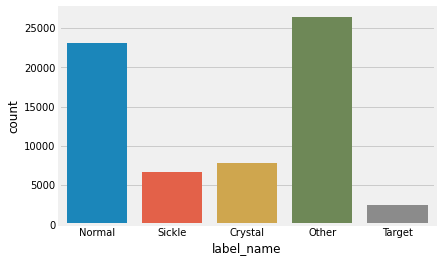

In [47]:
# Plot a count plot of the target variable
sns.countplot(x='label_name', data=df)
plt.show()

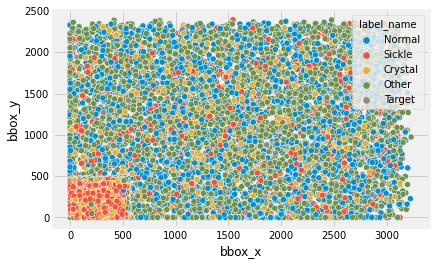

In [48]:
# Plot a scatter plot of two numerical columns
sns.scatterplot(x='bbox_x', y='bbox_y', hue='label_name', data=df)
plt.show()

In [49]:
# Separate the input features from the target variable
X = df.drop('label_name', axis=1)
y = df['label_name']

In [50]:
# Encode categorical features using LabelEncoder
le = LabelEncoder()
for column in X.columns:
    if X[column].dtype == np.object:
        X[column] = le.fit_transform(X[column])

<ipython-input-50-7204112764c5>:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if X[column].dtype == np.object:
<ipython-input-50-7204112764c5>:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if X[column].dtype == np.object:


In [52]:
# Normalize the numerical features using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [53]:
# Save the preprocessed data to a new CSV file
preprocessed_df = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)
preprocessed_df.to_csv('drive/My Drive/Sickle cell detection/preprocessed_file.csv', index=False)